### ENSIMAG – Grenoble INP – UGA - Academic year 2025-2026
# Introduction to Statistical Learning and Applications ([website](https://github.com/ISLA-Grenoble/2026-main))

- Pedro L. C. Rodrigues -- `pedro.rodrigues@inria.fr`

- Isabella Costa Maia -- `isabella.costa-maia@grenoble-inp.fr`

***

### ⚠️ General guidelines for TPs

Each team shall upload its report on [Teide](https://teide.ensimag.fr/) before the deadline indicated at the course website. Please
**include the name of all members** of the team on top of your report.
The report should contain graphical representations and explanatory text. For each graph, axis names should be provided as well
as a legend when it is appropriate. Figures should be explained by a few sentences in the text. Answer to
the questions in order and refer to the question number in your report. Computations and
graphics have to be performed in `python`. The report should be written as a jupyter notebook. This is a file format that allows users to format documents containing text written in markdown and `python` instructions. You should include all of the `python` instructions that you have used in the document so that it may be possible to replicate your results.

***

# 🖥️ TP1: Analysis of prostate cancer data

A medical study done on patients with prostate cancer aims to analyze the correlation between the prostate tumor volume and a set of clinical and morphometric variables. These variables include prostate specific antigens, a biomarker for prostate cancer, and a number of clinical measures (age, prostate weight, etc). The goal of this lab is to build a regression model to predict the severity of cancer, expressed by logarithm of the tumor volume -- `lcavol` variable -- from the following predictors:
- `lpsa`: log of a prostate specific antigen
- `lweight`: log of prostate weight
- `age`: age of the patient
- `lbph`: log of benign prostatic hyperplasia amount
- `svi`: seminal vesicle invasion
- `lcp`: log of capsular penetration
- `gleason`: Gleason score (score on a cancer prognosis test)
- `pgg45`: percent of Gleason scores 4 or 5

The file `prostate.data`, available [here](https://github.com/ISLA-Grenoble/2025-main/blob/main/TP/TP1/prostate.data), contains measures of the logarithm of the tumor
volume and of the 8 predictors for 97 patients. This file also contains an additional variable, called `train`, which will
not be used and has to be removed.

## ▶️ Exercise 1: Preliminary analysis of the data (1 points)

**(a)** Download the file `prostate.data` and store it in your current folder. Read the dataset in using `pandas` as per
```
import pandas as pd
df = pd.read_csv("prostate.data", sep="\t")
```
check how to use function `df.drop` to remove the first and last columns of `df` containing useless tags.

In [2]:
import pandas as pd
df = pd.read_csv("prostate.data", sep="\t")
df = df.drop(columns=[df.columns[0], df.columns[-1]])
df.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564


**(b)** The function defined below generates scatterplots (clouds of points) between all pairs of variables, allowing us to visually analyse the correlations between all variables in the dataframe. Explain what each line of function `pairplot` does and how it affects the final plot. You can use command `help` in the `python` shell to get the documentation of each function.

``` 
# import the main plotting library for python
import matplotlib.pyplot as plt

# make a pairplot from scratch
def pairplot(df, figsize=None):
    if figsize is None:
        figsize = (7.10, 6.70)
    n_vars = df.shape[1]
    fig, ax = plt.subplots(figsize=figsize, ncols=n_vars, nrows=n_vars)
    plt.subplots_adjust(
        wspace=0.10, hspace=0.10, left=0.05, right=0.95, bottom=0.05, top=0.95)
    for i in range(n_vars):
        for j in range(n_vars):
            axij = ax[i][j]
            i_name = df.columns[i]
            j_name = df.columns[j]
            axij.set_xticks([])
            axij.set_yticks([])
            axij.margins(0.1)
            if i != j:
                axij.scatter(df[i_name], df[j_name], s=10)
            else:
                axij.text(0.5, 0.5, i_name, fontsize=10,
                              horizontalalignment='center',
                              verticalalignment='center',
                              transform = axij.transAxes)        
    return fig, ax

fig, ax = pairplot(df)
plt.show()
```

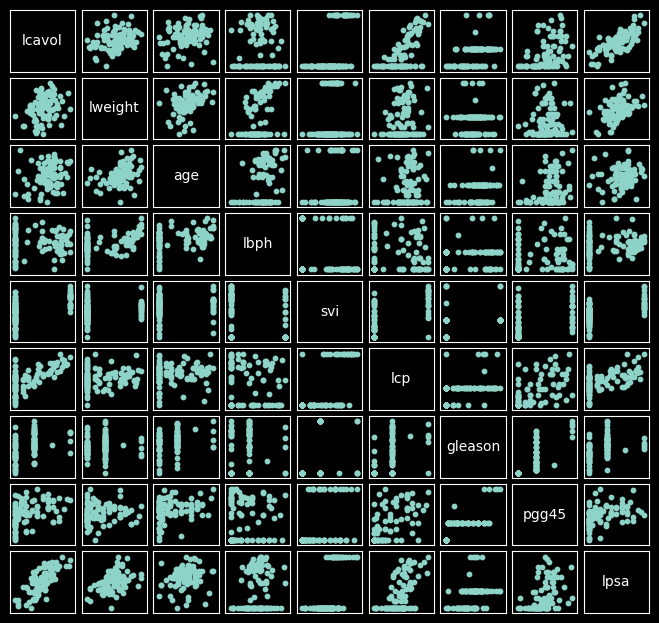

In [3]:
# import the main plotting library for python
import matplotlib.pyplot as plt

# make a pairplot from scratch
def pairplot(df, figsize=None):
    if figsize is None:
        figsize = (7.10, 6.70) #default image size
    n_vars = df.shape[1] # number of variables, grid dimensions
    fig, ax = plt.subplots(figsize=figsize, ncols=n_vars, nrows=n_vars) # create main figure fig and subplots ax
    plt.subplots_adjust(
        wspace=0.10, hspace=0.10, left=0.05, right=0.95, bottom=0.05, top=0.95) # adjusts whitespace, margins
    for i in range(n_vars): # iteration on every plot
        for j in range(n_vars):
            axij = ax[i][j] # subplot index i, j
            i_name = df.columns[i] #  name of column i
            j_name = df.columns[j] # name of column j
            axij.set_xticks([]) # removes ticks on X
            axij.set_yticks([]) # removes ticks on Y
            axij.margins(0.1) # sets margins
            if i != j:
                axij.scatter(df[i_name], df[j_name], s=10) #
            else:
                axij.text(0.5, 0.5, i_name, fontsize=10,
                              horizontalalignment='center',
                              verticalalignment='center',
                              transform = axij.transAxes) #
    return fig, ax

fig, ax = pairplot(df)
plt.show()

**(c)** Based on the generated figure, identify which variables seem the most correlated to `lcavol`. Also, infer the datatype for each of the predictors.

lcavol seems the most correlated to lpsa (there is a clear, positive linear trend which shows the correlation), and to lcp which also shows a positive linear trend apart from the beginning.

lweight, lbph, lcp, pgg, lpsa, age are continuous variables (floats).
svi is most likely a binary variable (two distinct lines).
gleason is a discrete variable which can take 4 values (four lines).

**(d)** Recall the formula of correlation between two vectors and implement it with `numpy`. Explain the difference of your result when compared to `df.corr()`. Change the function `pairplot`to show the correlation coefficient on the upper triangle of the subplots. (Bonus) Use locally weighted scatterplot smoothing (LOWESS) to see the trends between pairs of features with `statsmodels.nonparametric.smoothers_lowess`.

$r = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2} \sqrt{\sum_{i=1}^{n} (y_i - \bar{y})^2}}$

In [4]:
import numpy as np

def correlation(x, y):
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    numerator = np.sum((x - mean_x) * (y - mean_y))
    denominator = np.sqrt(np.sum((x - mean_x)**2) * np.sum((y - mean_y)**2))
    return numerator / denominator

`df.corr()` computes the correlation matrix for the whole DataFrame and returns a new DataFrame while `correlation(x,y)` returns a scalar for just two vectors.

/home/lucasn/Ensimag/2026-main/.venv/lib/python3.12/site-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


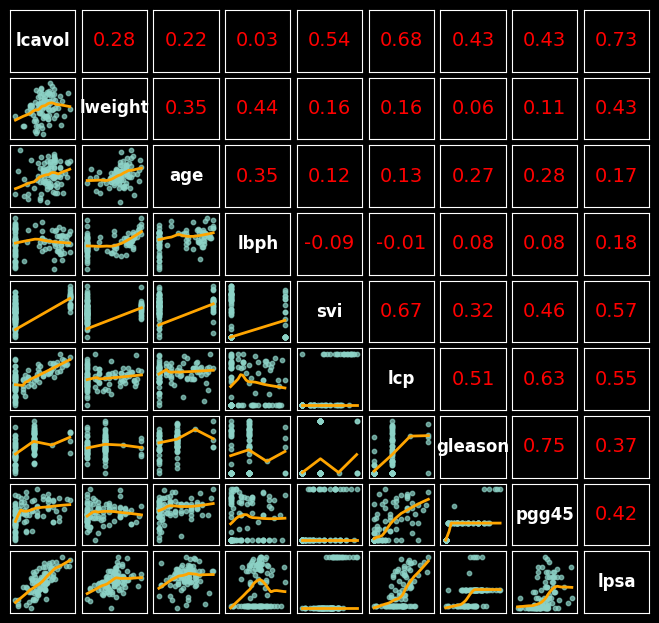

In [5]:
# import the main plotting library for python
import matplotlib.pyplot as plt
import statsmodels.api as sm
lowess = sm.nonparametric.lowess
# make a pairplot from scratch
def pairplot_2(df, figsize=None):
    if figsize is None:
        figsize = (7.10, 6.70) #default image size
    n_vars = df.shape[1] # number of variables, grid dimensions
    fig, ax = plt.subplots(figsize=figsize, ncols=n_vars, nrows=n_vars) # create main figure fig and subplots ax
    plt.subplots_adjust(
        wspace=0.10, hspace=0.10, left=0.05, right=0.95, bottom=0.05, top=0.95) # adjusts whitespace, margins
    for i in range(n_vars): # iteration on every plot
        for j in range(n_vars):
            axij = ax[i][j] # subplot index i, j
            i_name = df.columns[i] #  name of column i
            j_name = df.columns[j] # name of column j
            axij.set_xticks([]) # removes ticks on X
            axij.set_yticks([]) # removes ticks on Y
            axij.margins(0.1) # sets margins
            if i == j:
                # Name of the variable on the diagonal
                axij.text(0.5, 0.5, i_name, fontsize=12, fontweight='bold',
                          horizontalalignment='center', verticalalignment='center',
                          transform=axij.transAxes)
            elif i < j:
                # Correlation coeff on the upper triangle
                corr_val = correlation(df[i_name], df[j_name])
                axij.text(0.5, 0.5, f"{corr_val:.2f}", fontsize=14, color='red',
                          horizontalalignment='center', verticalalignment='center',
                          transform=axij.transAxes)
            else:
                #scatter plot like before but with lowess
                x_data = df[i_name]
                y_data = df[j_name]
                axij.scatter(x_data, y_data, s=10, alpha=0.7)
                z = lowess(y_data, x_data, frac=0.6)
                axij.plot(z[:, 0], z[:, 1], color='orange', linewidth=2)
    return fig, ax

fig, ax = pairplot_2(df)
plt.show()

## ▶️ Exercise 2: Linear regression (7 points)

In this exercise, we will perform a multiple linear regression to build a predictive model for the `lcavol` variable. The variables `gleason` and `svi` should be considered as qualitative variables. You can declare them as such with

```
df['svi'] = df['svi'].astype("category")
df['gleason'] = df['gleason'].astype("category")
```

**(a)** Provide the mathematical equation of the regression model (note that you can use LaTeX to write equations) and define the diﬀerent parameters.

In [6]:
df['svi'] = df['svi'].astype("category")
df['gleason'] = df['gleason'].astype("category")

$lcavol = \beta_0 + \beta_1 \text{lpsa} + \beta_2 \text{lweight} + \beta_3 \text{age} + \beta_4 \text{lbph} + \beta_5 \text{lcp} + \beta_6 \text{pgg45} + \beta_7 \mathbb{1}_{(\text{svi}=1)} + \sum_{k \in \{7,8,9\}} \gamma_k \mathbb{1}_{(\text{gleason}=k)} + \epsilon$

Here, $\beta_0$ denotes the model intercept. The coefficients $\beta_1, \dots, \beta_6$ represent the marginal effects of the continuous predictors (lpsa, lweight, age, lbph, lcp, pgg45). $\beta_7$ captures the additive effect of the binary variable svi. The parameters $\gamma_k$ correspond to the effects of having a Gleason score of $k \in \{7, 8, 9\}$ relative to the baseline score of 6. Finally, $\epsilon$ represents the random error term, assumed to follow a normal distribution $\mathcal{N}(0, \sigma^2)$.




**(b)** Before doing the linear regression of this TP, you will first have to handle the one-hot encoding of the categorical features of the dataframe. One way of doing this is as follows:

```
# encode the categorical features with dummy variables
df_enc = pd.get_dummies(df, dtype=np.float64)
# to drop one dummy column for each predictor
df_enc = df_enc.drop(columns=['svi_0', 'gleason_6'])
# add a column of ones to the dataframe
df_enc['intercept'] = 1
# extract the dataframe for predictors
X = df_enc.drop(columns=['lcavol'])
# get the observed values to predict
y = df['lcavol']
```

- Why did we fix a `dtype` in `pd.get_dummies`?
- Why did we drop two columns after the encoding?
- Why did we add a column of ones to the dataframe?

In [7]:
# encode the categorical features with dummy variables
df_enc = pd.get_dummies(df, dtype=np.float64)
# to drop one dummy column for each predictor
df_enc = df_enc.drop(columns=['svi_0', 'gleason_6'])
# add a column of ones to the dataframe
df_enc['intercept'] = 1
# extract the dataframe for predictors
X = df_enc.drop(columns=['lcavol'])
# get the observed values to predict
y = df['lcavol']

We have to ensure that dummy variables are floats (0.0 and 1.0) to prevent potential type error. By default, booleans columns are generated for one-hot encoding in pandas.

If we keep `svi_0` and `svi_1`, there sum would be equal to one for every row which would generate a linear dependency with the intercept (which is a column of 1). This would make the design matrix non-invertible which is why we are dropping `svi_0`. Same goes for `gleason_6`.

`statsmodels`, which is used in question c, require the design matrix to include this column of ones to estimate the intercept $\beta_0$ correctly.

**(c)** We will use the [`statsmodels`](https://www.statsmodels.org/) package to estimate the coefficients of the multiple linear regression as per:

```
# import required package
import statsmodels.api as sm
# this line does not fit the regression model per se but only builds it
model = sm.OLS(y, X)
# now we actually fit the model, e.g. calculate all of regression parameters
results = model.fit()
```

Use command `results.sumary()` to get the statistical summary of the estimated coefficients. 

- Explain to what correspond the regression coeﬃcients for the lines related to `svi` and `gleason`. 

- What would have happened in the regression if we did not do the one-hot encoding from above?

- Comment the overall results of the regression as well.

In [8]:
# import required package
import statsmodels.api as sm
# this line does not fit the regression model per se but only builds it
model = sm.OLS(y, X)
# now we actually fit the model, e.g. calculate all of regression parameters
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lcavol   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     18.83
Date:                Tue, 17 Feb 2026   Prob (F-statistic):           9.05e-18
Time:                        11:38:59   Log-Likelihood:                -96.825
No. Observations:                  97   AIC:                             215.7
Df Residuals:                      86   BIC:                             244.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lweight       -0.0112      0.211     -0.053      0.958      -0.432       0.409
age            0.0248      0.011      2.205      0.030       0.002       0.047
lbph          -0.1042      0.058     -1.790      0.077      -0.220       0.012
lcp            0.4028      0.085      4.734      0.000       0.234       0.572
pgg45         -0.0094      0.005     -2.080      0.040      -0.018      -0.000
lpsa           0.5496      0.090      6.100      0.000       0.370       0.729
svi_1         -0.2204      0.256     -0.860      0.392      -0.730       0.289
gleason_7      0.3117      0.215      1.448      0.151      -0.116       0.740
gleason_8     -0.7106      0.759     -0.936      0.352      -2.219       0.798
gleason_9      0.7901      0.488      1.621      0.109      -0.179       1.759
intercept     -1.4067      0.874     -1.609      0.111      -3.145       0.332
==============================================================================
Omnibus:                        0.107   Durbin-Watson:                   2.306
Prob(Omnibus):                  0.948   Jarque-Bera (JB):                0.127
Skew:                          -0.073   Prob(JB):                        0.939
Kurtosis:                       2.900   Cond. No.                         884.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coef `svi_1` (-0.2204) is the difference of `lcavol` between a patient who has an svi and a patient who doesn't have one.
`gleason_7` (0.3117) is the difference of `lcavol` between a patient with a Gleason score of 7 and a patient with a Gleason score of 6 (the reference). Idem for `gleason_8` and `gleason_9`.

Without the one-hot encoding, `gleason` would have been treated like a single numerical variable (which takes values in 6, 7, 8, 9). The model would be linear which is not medically accurate : severity does not always scale linearly with the score.

The coef for `lpsa` is 0.5496 (with a p-value of 0) which shows that higher PSA levels are strongly associated with larger tumor volume. Same with `lcp` (coef 0.4028, p-value 0). As for the `age` and `pgg45`, their coeffs are small but they are statistically significant (p-value of 0.030 and 0.040).
On the other side, `lweight` is not significant at all (P = 0.958). Neither are `svi` and `gleason` (P-values > 0.1).
Also, the R-squared is 0.686 : 31% of the variance of tumor volume remains unexplained but it seems decent.

**(d)** Use `results.conf_int` to get confidence intervals of level 95% for all the coeﬃcients of the predictors. Comment the results.

In [9]:
results.conf_int()

,0,1
lweight,-0.431600,0.409107
age,0.002436,0.047129
lbph,-0.219914,0.011515
lcp,0.233639,0.571880
pgg45,-0.018469,-0.000419
lpsa,0.370474,0.728673
svi_1,-0.730029,0.289190
gleason_7,-0.116263,0.739616
gleason_8,-2.219087,0.797911
gleason_9,-0.179004,1.759273


A coefficient is statistically significant if its confidence interval does not contain the value 0. We find the same results than the ones of question c).

**(e)** What can you say about the eﬀects of the `lpsa` variable? Relate your answer to the $p$-value of a hypothesis test and a confidence interval. You can use `results.pvalues`.

In [10]:
results.pvalues

lweight      9.577075e-01
age          3.014993e-02
lbph         7.695609e-02
lcp          8.577858e-06
pgg45        4.047741e-02
lpsa         2.939241e-08
svi_1        3.922717e-01
gleason_7    1.512950e-01
gleason_8    3.516744e-01
gleason_9    1.087313e-01
intercept    1.113676e-01
dtype: float64

The p-value of `lpsa` is nearly 0 which means we reject the null hypothesis ($\beta_1 = 0$ ), the effect of `lpsa` is highly linked with the size of the tumor. Also, its confidence interval does not contain zero which accentuates this effect. Same for the coefficient estimated.

**(f)** Implement yourself a function that calculates the values of the parameters and their corresponding $p$-values. Bonus: explain why `numpy.linalg.inv` is not necessarily the best choice for estimating the parameters as compared to `numpy.linalg.solve`.

In [11]:
import numpy as np
from scipy import stats

def pval_stats(X, y):
    # Convertir en matrices numpy si ce sont des DataFrames
    X_mat = np.array(X)
    y_vec = np.array(y)

    n, p = X_mat.shape
    # Beta_hat
    XtX = X_mat.T @ X_mat
    Xty = X_mat.T @ y_vec
    beta = np.linalg.solve(XtX, Xty)

    # Residuals
    y_pred = X_mat @ beta
    residuals = y_vec - y_pred
    sigma2 = np.sum(residuals**2) / (n - p)

    # Covariance Matrix
    XtX_inv = np.linalg.inv(XtX)
    cov_beta = sigma2 * XtX_inv

    # T-statistic
    se = np.sqrt(np.diag(cov_beta))
    t_stats = beta / se

    # P-Values with Student law
    p_values = 2 * stats.t.sf(np.abs(t_stats), df=n-p)

    return beta, p_values

my_beta, my_pvalues = pval_stats(X, y)

# Comparison
import pandas as pd
p_val_comparison = pd.DataFrame({
    'My p-value': my_pvalues,
    'p-value (statsmodels)': results.pvalues
})

print(p_val_comparison)

             My p-value  p-value (statsmodels)
lweight    9.577075e-01           9.577075e-01
age        3.014993e-02           3.014993e-02
lbph       7.695609e-02           7.695609e-02
lcp        8.577858e-06           8.577858e-06
pgg45      4.047741e-02           4.047741e-02
lpsa       2.939241e-08           2.939241e-08
svi_1      3.922717e-01           3.922717e-01
gleason_7  1.512950e-01           1.512950e-01
gleason_8  3.516744e-01           3.516744e-01
gleason_9  1.087313e-01           1.087313e-01
intercept  1.113676e-01           1.113676e-01


**(g)** Plot the predicted values of `lcavol` as a function of the actual values. For this, you can can use `results.get_prediction` to get predictions over `X` and then get its `predicted_mean` attribute.

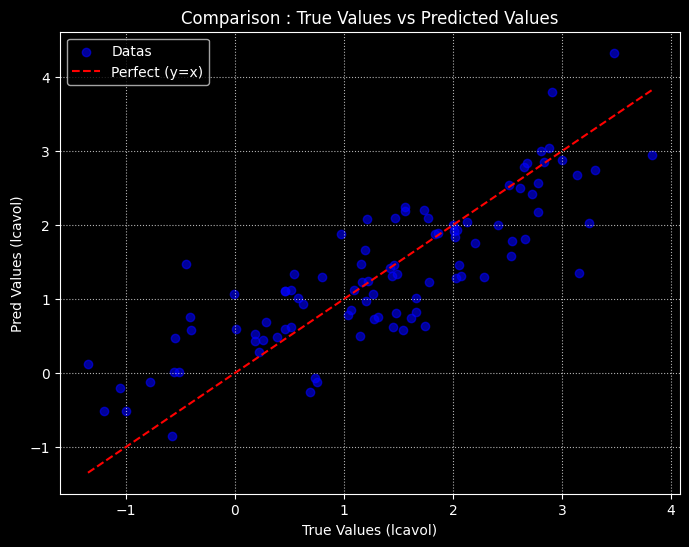

In [12]:
prediction_obj = results.get_prediction(X)
y_pred = prediction_obj.predicted_mean

plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, alpha=0.6, color='blue', label='Datas')

line_coords = [y.min(), y.max()]
plt.plot(line_coords, line_coords, color='red', linestyle='--', label='Perfect (y=x)')

plt.xlabel('True Values (lcavol)')
plt.ylabel('Pred Values (lcavol)')
plt.title('Comparison : True Values vs Predicted Values')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.7)
plt.show()

**(h)** Plot the histogram of residuals as well as their qq-plot using `statsmodels` function `qqplot`. Can we admit that the residuals are normally distributed? Compute the residual sum of squares (RSS).

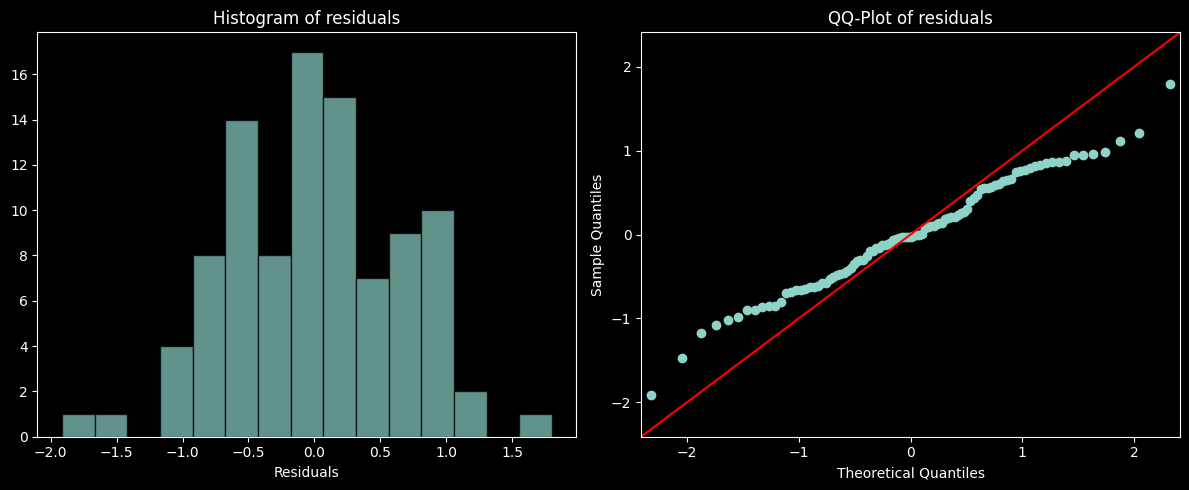

Residual Sum of Squares (RSS) : 41.8141


In [13]:
import scipy.stats as stats

residuals = results.resid
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.hist(residuals, bins=15, edgecolor='black', alpha=0.7)
ax1.set_title('Histogram of residuals')
ax1.set_xlabel('Residuals')
# 3. Calcul du RSS (Residual Sum of Squares)
sm.qqplot(residuals, line='45', ax=ax2)
ax2.set_title('QQ-Plot of residuals')

plt.tight_layout()
plt.show()

rss = np.sum(residuals**2)
print(f"Residual Sum of Squares (RSS) : {rss:.4f}")

Looking at the histogram, we can clearly see a normal distribution centered on zero for the residuals. As for the QQ-plots, the points are aligned with the red line which ensure the normality of the distribution of the residuals.

**(i)** What happens if predictors `lpsa` and `lcp` are removed from the multiple linear regression model? Note that you can pass a list of strings to `df.columns.drop` method.

Without the 2 most important statistics for the model, the R-Squared will drop, reducing drastically the precision of the model. Predictions will be less accurate, increasing the RSS. `lweight`, `svi_1` and `gleason_7` have become the most significative statistics (P-value < 0.05).

In [14]:
X_reduced = X.drop(columns=['lpsa', 'lcp'])
model_reduced = sm.OLS(y, X_reduced)
results_reduced = model_reduced.fit()
print(results_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:                 lcavol   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     8.390
Date:                Tue, 17 Feb 2026   Prob (F-statistic):           2.11e-08
Time:                        11:39:00   Log-Likelihood:                -125.58
No. Observations:                  97   AIC:                             269.2
Df Residuals:                      88   BIC:                             292.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lweight        0.5850      0.259      2.257      0.0

## ▶️ Exercise 3: Best subset selection (5 points)

A regression model that uses $k$ predictors is said to be of size $k$. For instance, 

$$
\texttt{lcavol} = \beta_1 \texttt{lpsa} + \beta_0 + \varepsilon \quad \text{and} \quad \texttt{lcavol} = \beta_1 \texttt{lweight} + \beta_0 + \varepsilon
$$

are models of size one. The regression model without any predictor $\texttt{lcavol} = \beta_0 + \varepsilon$ is a model of size 0.

The goal of this exercise is to select the best model of size $k$ for each $k \in \{0, \dots, 8\}$.

**(a)** Compute the residual sums of squares (RSS) for all models of size $k = 2$. Which model has the smallest RSS? Note that you can use a generator [`itertools.combination`](https://docs.python.org/3/library/itertools.html#itertools.combinations) to automatize for you all the combinations of $k$ elements among $n$.

**(b)** For each value of $k \in \{0, \dots, 8\}$, select the set of predictors that minimizes the RSS. Plot these values as a function of $k$. Provide the names of the selected predictors for each value of $k$.

**(c)** Do you think that minimizing the residual sum of squares is well suited to select the optimal size for the regression models? Justify your answer using what you've learned in class.

In [16]:
import itertools
import matplotlib.pyplot as plt

predictors = ['lpsa', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']

col_mapping = {
    'lpsa': ['lpsa'],
    'lweight': ['lweight'],
    'age': ['age'],
    'lbph': ['lbph'],
    'svi': ['svi_1'],
    'lcp': ['lcp'],
    'gleason': ['gleason_7', 'gleason_8', 'gleason_9'],
    'pgg45': ['pgg45']
}

def get_rss(selected_predictors, X, y):
    if not selected_predictors: # Cas k=0
        columns = ['intercept']
    else:
        columns = ['intercept']
        for p in selected_predictors:
            columns.extend(col_mapping[p])

    model = sm.OLS(y, X[columns])
    results = model.fit()
    return results.ssr

k = 2
best_rss = float('inf')
best_pair = None

for combo in itertools.combinations(predictors, k):
    rss = get_rss(combo, X, y)
    if rss < best_rss:
        best_rss = rss
        best_pair = combo

print(f"Best pair : {best_pair}")
print(f"minimal RSS : {best_rss:.4f}")

Best pair : ('lpsa', 'lcp')
minimal RSS : 47.2781


k=0 | RSS=133.3590 | Predictors: ['(Intercept only)']
k=1 | RSS=61.4209 | Predictors: ('lpsa',)
k=2 | RSS=47.2781 | Predictors: ('lpsa', 'lcp')
k=3 | RSS=46.2378 | Predictors: ('lpsa', 'age', 'lcp')
k=4 | RSS=44.8784 | Predictors: ('lpsa', 'age', 'lbph', 'lcp')
k=5 | RSS=43.6900 | Predictors: ('lpsa', 'age', 'lcp', 'gleason', 'pgg45')
k=6 | RSS=42.1739 | Predictors: ('lpsa', 'age', 'lbph', 'lcp', 'gleason', 'pgg45')
k=7 | RSS=41.8154 | Predictors: ('lpsa', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45')
k=8 | RSS=41.8141 | Predictors: ('lpsa', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45')


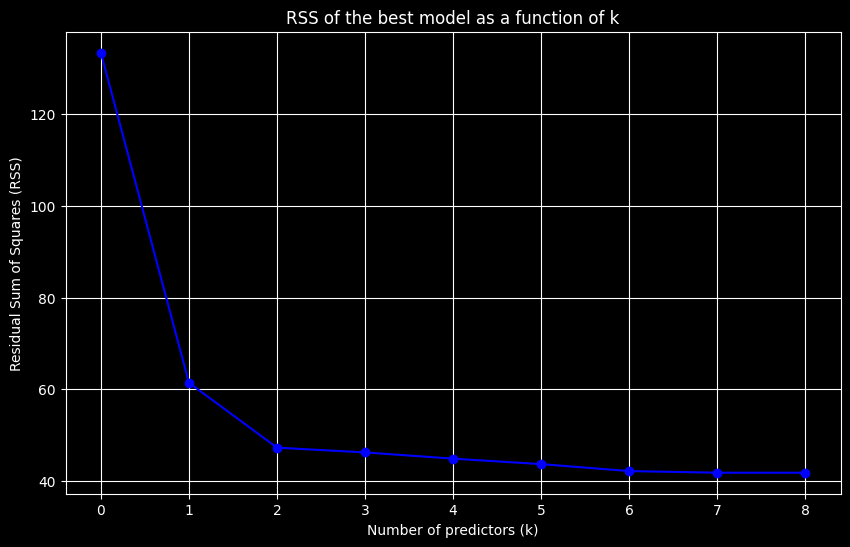

In [17]:
best_rss_per_k = []
best_predictors_per_k = []
k_values = range(9)

for k in k_values:
    best_rss = float('inf')
    best_combo = []

    if k == 0:
        best_rss = get_rss([], X, y)
        best_combo = ["(Intercept only)"]
    else:
        for combo in itertools.combinations(predictors, k):
            rss = get_rss(combo, X, y)
            if rss < best_rss:
                best_rss = rss
                best_combo = combo

    best_rss_per_k.append(best_rss)
    best_predictors_per_k.append(best_combo)
    print(f"k={k} | RSS={best_rss:.4f} | Predictors: {best_combo}")

plt.figure(figsize=(10, 6))
plt.plot(k_values, best_rss_per_k, marker='o', linestyle='-', color='b')
plt.xlabel("Number of predictors (k)")
plt.ylabel("Residual Sum of Squares (RSS)")
plt.title("RSS of the best model as a function of k")
plt.grid(True)
plt.show()

Minimizing RSS is not well suited to select the optimal size. We can see on the graph that the RSS always decreases as k increases. We would always select the model with the most predictors, which could create overfitting, where the model learns the noise in the training set rather than the pattern.

## ▶️ Exercise 4: Split-validation (5 points)

You have now found the best model for each of the nine possible model sizes. In the following, we wish to compare these nine diﬀerent regression models.

**(a)** Give a brief overview of split-validation: how it works? Why it is not subject to the same issues raised in
the item (c) of the previous Exercise?

**(b)** Use function `train_test_split` from the `sklearn` package to split the dataset into a training and a validation (or test) partition. You can set `test_size=0.3`. For each of the nine models from before (i.e. those that minimized the RSS for each size $k$), compute the mean prediction error calculated over the samples from the test set and compare it to its corresponding mean training error. Plot a curve for each of these error as a function of size $k$. 

**(c)** Based on the previous results, choose the best model for this dataset, giving the parameter estimates for the model trained on the whole dataset (i.e. without splitting), and explain your choice.

**(d)** What is the main limitation of split-validation ? Illustrate this issue on the cancer dataset. What could
you do to address this problem? Code such alternative method and comment the result. Note that `sklearn` can provide you with many choices. See [here](https://scikit-learn.org/stable/model_selection.html) for more information.

Split-validation seperates the dataset into two sets : the training set which is used to estimate the model parameters and the validation set which is used to evaluate how the model generalizes to unseen data. While the RSS always decreases, the test error decreases as the model learns the patterns but starts increasing when the model begins to overfit (learning the noise). That would give us a better estimation for the best model.

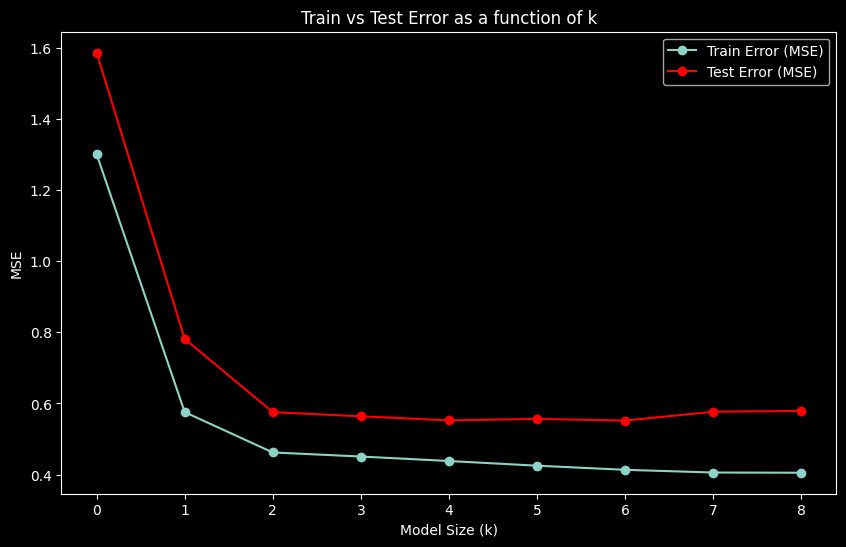

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

train_errors = []
test_errors = []

for k, predictors_k in enumerate(best_predictors_per_k):
    cols = ['intercept']
    if k > 0:
        for p in predictors_k:
            cols.extend(col_mapping[p])

    model = sm.OLS(y_train, X_train[cols]).fit()

    mse_train = mean_squared_error(y_train, model.predict(X_train[cols]))
    mse_test = mean_squared_error(y_test, model.predict(X_test[cols]))

    train_errors.append(mse_train)
    test_errors.append(mse_test)

plt.figure(figsize=(10, 6))
plt.plot(range(9), train_errors, label='Train Error (MSE)', marker='o')
plt.plot(range(9), test_errors, label='Test Error (MSE)', marker='o', color='red')
plt.xlabel('Model Size (k)')
plt.ylabel('MSE')
plt.title('Train vs Test Error as a function of k')
plt.legend()
plt.show()

The test MSE reaches a minimum at k=4. k=6 shows a similar error but i would rather select the simpler model to prevent overfitting.

We have a small data set ($n=97$) and the size of the test set is 29. The evaluation of the model's performance relies on which specific data points are in the test set. We could change the random seed used to see that the shape of the test error curve changes, which would imply a change in the best selected model size. Therefore, this method is unstable, as showed in the illustration below.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

seeds = [0, 1, 67, 123, 999]

print("Illustration of Instability of Split-Validation")

for seed in seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

    best_k = -1
    min_error = float('inf')

    for k, predictors_k in enumerate(best_predictors_per_k):
        cols = ['intercept']
        if k > 0:
            for p in predictors_k:
                cols.extend(col_mapping[p])

        model = sm.OLS(y_train, X_train[cols]).fit()
        mse_test = mean_squared_error(y_test, model.predict(X_test[cols]))

        if mse_test < min_error:
            min_error = mse_test
            best_k = k

    print(f"Random State {seed:3d} -> Best Model Size: k={best_k} (Test MSE={min_error:.4f})")

Illustration of Instability of Split-Validation
Random State   0 -> Best Model Size: k=2 (Test MSE=0.6077)
Random State   1 -> Best Model Size: k=5 (Test MSE=0.4124)
Random State  67 -> Best Model Size: k=2 (Test MSE=0.5344)
Random State 123 -> Best Model Size: k=5 (Test MSE=0.3550)
Random State 999 -> Best Model Size: k=3 (Test MSE=0.3492)


We have to use $K$-Fold Cross Validation which divides the data into $K$ sets (folds). The model is trained on $K - 1$ folds and tested on the remaining one. The process is repeated $K$ times (one for each fold). We average the $K$ test errors which guaranties a more stable estimation of the model's performance. We will take $K = 5$ for this example.


Results with 5-Fold Cross-Validation
k=0 | CV Mean MSE = 1.7416
k=1 | CV Mean MSE = 0.6305
k=2 | CV Mean MSE = 0.5172
k=3 | CV Mean MSE = 0.5142
k=4 | CV Mean MSE = 0.5212
k=5 | CV Mean MSE = 0.5019
k=6 | CV Mean MSE = 0.5024
k=7 | CV Mean MSE = 0.5012
k=8 | CV Mean MSE = 0.5284

Best model according to Cross-Validation: k=7


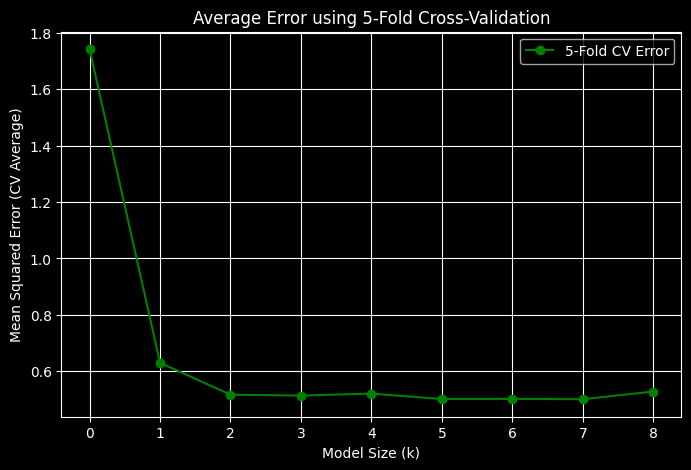

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
cv_mean_errors = []

print("\nResults with 5-Fold Cross-Validation")

for k, predictors_k in enumerate(best_predictors_per_k):
    if k == 0:
        current_X = np.zeros((len(y), 1))
    else:
        cols = []
        for p in predictors_k:
            cols.extend(col_mapping[p])
        current_X = X[cols].drop(columns=['intercept'], errors='ignore')

    # Compute scores (neg_mean_squared_error because sklearn maximizes scores)
    scores = cross_val_score(lr, current_X, y, cv=5, scoring='neg_mean_squared_error')

    # Convert back to positive MSE
    mean_mse = -scores.mean()
    cv_mean_errors.append(mean_mse)

    print(f"k={k} | CV Mean MSE = {mean_mse:.4f}")

best_k_cv = np.argmin(cv_mean_errors)
print(f"\nBest model according to Cross-Validation: k={best_k_cv}")

plt.figure(figsize=(8, 5))
plt.plot(range(9), cv_mean_errors, marker='o', color='green', label='5-Fold CV Error')
plt.xlabel('Model Size (k)')
plt.ylabel('Mean Squared Error (CV Average)')
plt.title('Average Error using 5-Fold Cross-Validation')
plt.grid(True)
plt.legend()
plt.show()

## ▶️ Exercise 5: Conclusion (2 points)

What is your conclusion about the choice of the best model to predict `lcavol` ? Comment your results.

According to the $K$-Fold validation the best model seems to be the model for $k = 7$. However, I think I would choose the model for $k = 5$ because its MSE is almost the same as for $k=7$ (0.5012 vs 0.5019) and it is simpler.
As for the parameters chosen, I would choose the predictors with the highest correlation with `lcavol` such as `lpsa` or `lcp` (basically the 5 parameters showed in exercise 3).
This model would capture the majority of the signal (with a high R_squared) without the noise due to overfitting.